### Importing Libraries

In [5]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# 1.Flipping the Odds: Biased Decisions with a Fair Coin

### Function flip coin  
Returns a boolean value (either True or False)
### How does it works?
We randomly generate a number between 0 and 1, if it is less than 0.5 then we return True(Simulating Heads) else we return False(Simulating Tails)

In [6]:
def flip_coin() -> bool:
    toss = random.random()
    if(toss < 0.5):
        return True #heads
    else:
        return False #tails
#The statement below is just to check if the function works well!
trials = 50000
count = 0
for i in range(trials): 
    if(flip_coin()):
        count+=1
print('Probablity of heads: ',count/trials)  


Probablity of heads:  0.4998


### Function biased_coin: 
Takes the function and float p as arguments and returns a boolean value
### What are we doing?
1. We consider the interval [0,1] and we roll the fair coin continously until a specific condition is met(we will talk about the condition in upcoming points).
2. If heads comes up we consider the left half of the interval and if tails comes up we consider the right half of the interval.
3. We repeat the above process until the whole interval on the one side of float 'p'(our desired biased probablity).
4. If the final interval lies to left of p, we return true(heads) and if the final interval lies to the right of p, we return false(tails).

In [7]:
def biased_coin(fair_coin_func: callable, p: float) -> bool:
    lower, upper = 0.0, 1.0
    while True:
        mid = (lower + upper) / 2
        if fair_coin_func():
            upper = mid  # Heads take left interval
        else:
            lower = mid  # Tails  take right interval
        
        if upper <= p:
            return True
        if lower > p:
            return False
#code below is just to check if the function biased_coin works well            
count = 0
p = 1/8
for i in range (trials):
    if(biased_coin(flip_coin, p)):
        count+=1
print('Probablity of Heads(Movies): ',count/trials)

Probablity of Heads(Movies):  0.1236


### Collecting data for PMF of fair coin

In [8]:
fair_results = [flip_coin() for _ in range(trials)]
fair_heads_count = sum(fair_results)
fair_tails_count = trials - fair_heads_count
fair_pmf = {
    'Heads': fair_heads_count / trials,
    'Tails': fair_tails_count / trials
}

print(fair_pmf)

{'Heads': 0.50172, 'Tails': 0.49828}


### Collecting data for PMF of biased coin

In [9]:
biased_results = [biased_coin(flip_coin, p) for _ in range(trials)]
biased_heads_count = sum(biased_results)
biased_tails_count = trials - biased_heads_count
biased_pmf = {
    'Heads': biased_heads_count / trials,
    'Tails': biased_tails_count / trials
}
print(biased_pmf)

{'Heads': 0.1206, 'Tails': 0.8794}


### Displaying the Plots

Text(0, 0.5, 'Probability')

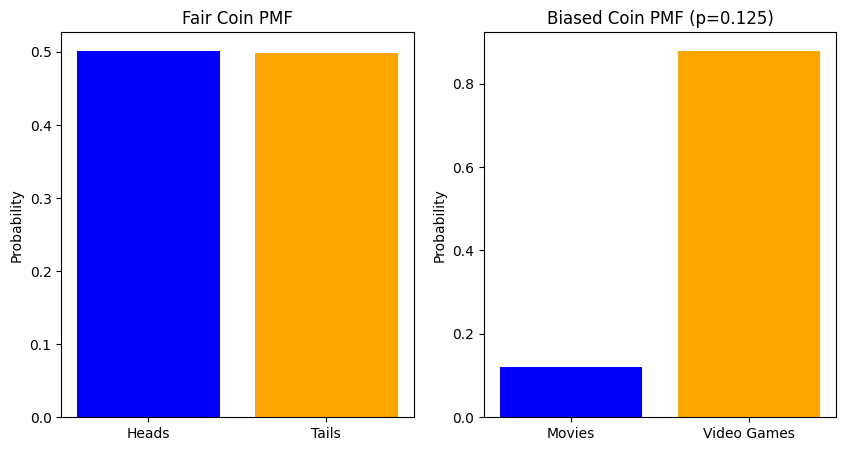

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(['Heads', 'Tails'], [fair_pmf['Heads'], fair_pmf['Tails']], color=['blue', 'orange'])
ax1.set_title('Fair Coin PMF')
ax1.set_ylabel('Probability')

ax2.bar(['Movies', 'Video Games'], [biased_pmf['Heads'], biased_pmf['Tails']], color=['blue', 'orange'])
ax2.set_title(f'Biased Coin PMF (p={p})')
ax2.set_ylabel('Probability')

# 2.Analyzing Data

### (a) Titanic Dataset: Given that the person survived, what is the probability that his ticket Class is two?

Let 
$U=$ set of all passengers, $S=$ set of surviving passengers, and $T=$ set of passengers with ticket class 2.

1. Importing the given csv file into a DataFrame, __titanic_df__, representing $U$.
2. Counting the number of passengers we have the details of, equivalent to $n(U)$.
3. Finding the selection of these passengers that survived, and place their data in a different DataFrame, named __survivors_df__. This represents the set $S$.

In [11]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')
count_passengers = titanic_df.shape[0] #total passengers
survivors_df = titanic_df[titanic_df['Survived'] == 1] #passengers that survived

4. We count the number of surviving passengers $n(S)$ and the probability of survival $P(S)$

In [12]:
total_survivors = survivors_df.shape[0]
probability_survival = total_survivors / count_passengers

5. Out of these surviors we then find out number of passengers with ticket class 2 $n(T \cap S)$, and their probability $P(T\cap S)$.

In [13]:
count_tclass2_survived = survivors_df[survivors_df['Ticket class']==2].shape[0] #passengers whose class was 2 
probability_both_tclass2_survived = count_tclass2_survived / count_passengers

6. Lastly we apply the formula for conditional probability $P(T|S)$, as given by $$P(T|S) = \frac{P(T\cap S)}{P(S)}$$

In [14]:
chance_tclass2_given_survivor = probability_both_tclass2_survived / probability_survival

#Print the result
print(f"Given that a person survived, the probability that their ticket class is 2: {chance_tclass2_given_survivor:.6f}")

Given that a person survived, the probability that their ticket class is 2: 0.286207


### (b) Height-Weight Dataset:
Number of people with a weight greater than 170 whose index is lesser than 4? (Index : 0 - Extremely Weak, 1 - Weak, 2 - Normal, 3 - Overweight, 4 - Obesity, 5 - Extreme Obesity)

Let $U=$ set of all people here, $W=$ set of people with a weight over $170$ (possibly pounds), and $O=$ set people with an index under 4 i.e. overweight or below.

We first import the given csv file into a DataFrame, __height_weight_df__, representing $U$.

In [18]:
#import the Height-Weight dataset, and store it in a DataFrame
height_weight_df = pd.read_csv('Height-Weight.csv')

We are required to find $n(W\cap O)$. We can use '$\And$' to count the number of people satisfying both conditions simultaneously.

In [19]:
count = height_weight_df[(height_weight_df['Weight'] > 170) & (height_weight_df['Index'] < 4)].shape[0]

Since the question strictly mentions, _lesser than_, the maximum index we can consider is $3$, and the maximum weight in these indices is 115, which is why, the final answer is $zero$.

In [17]:
print(f"Number of people who weigh more than 170 and have an index less than 4: {count}")

Number of people who weigh more than 170 and have an index less than 4: 0
